In [1]:
#Realizando os imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy
from scipy.linalg import svd, diagsvd


c:\Users\code\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [3]:
#Criando o dataframe com os dados
df = pd.read_csv("ratings_small.csv")
# Cria a matriz
matriz = df.pivot_table(index='userId', columns='movieId', values='rating')
matriz = matriz.fillna(0)

A = matriz.values

In [4]:
# Exibe a matriz
up, pp, pf = svd(A)

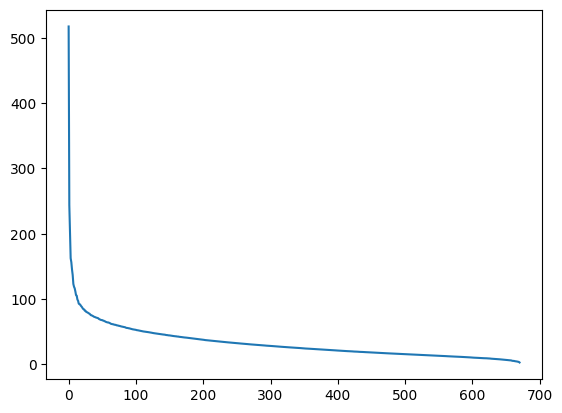

In [5]:
plt.figure()
plt.plot(pp)
plt.show()

In [29]:
A[1,8]


B = copy.deepcopy(A)


B[1,8] = 5


u, s, vt = svd(B)


u_, s_, vt_ = comprimir(u,s,vt,400)

B2 = u_ @ np.diag(s_) @ vt_ 

print(B2[1,8], A[1,8])

2.917831317784618 0.0
